In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20274,GF_10269,105,704,6448,2016-11-12 13:46:42.000,2016-11-17 10:46:42.000,2055,6883,995,1912,10,1899,2016-11-14 14:46:42.000,2016-11-11 03:00:00.000,0,NaN,57.68
20275,GF_5854,1220,526,817,2016-11-12 13:46:47.000,2016-11-18 13:46:47.000,8323,6753,6706,1912,10,1899,2016-11-13 10:46:47.000,2016-10-28 02:00:00.000,0,NaN,122.87
20276,GF_563,509,705,821,2016-11-12 13:46:57.000,2017-01-21 19:30:04.000,2826,4009,2912,1912,10,1451,2017-01-21 18:30:04.000,2017-01-18 01:00:00.000,0,NaN,47.14
20277,GF_9107,682,213,5620,2016-11-12 13:47:01.000,2016-11-18 11:47:01.000,2089,6883,3607,1912,10,822,2016-11-14 12:47:01.000,2016-11-13 02:00:00.000,0,NaN,47.68


In [6]:
test

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes
0,GF_2372,842,663,24,2016-11-12 13:49:12.000,2016-11-16 10:49:12.000,203,1334,4358,1912,10,1899,2016-11-16 12:49:12.000,2016-11-13 04:00:00.000,0,NaN
1,GF_13040,407,534,754,2016-11-12 13:49:22.000,2016-11-17 14:49:22.000,4785,5940,2582,1912,10,1488,2016-11-12 14:49:22.000,2016-11-03 01:00:00.000,0,NaN
2,GF_5754,631,433,6012,2016-11-12 13:49:23.000,2016-11-16 13:49:23.000,1812,5027,3427,1912,10,1913,2016-11-15 11:49:23.000,2016-11-01 05:00:00.000,1,NaN
3,GF_1417,992,433,6358,2016-11-12 13:49:24.000,2016-11-16 11:49:24.000,2002,6883,5537,1912,10,1734,2016-11-14 12:49:24.000,2016-11-04 04:00:00.000,0,NaN
4,GF_23204,43,534,6123,2016-11-12 13:49:40.000,2016-11-18 11:49:40.000,1512,6883,610,1912,9,150,2016-11-14 10:49:40.000,2016-11-02 01:00:00.000,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13514,GF_29169,31,65,0,2017-04-07 20:51:34.000,2017-04-10 19:51:34.000,3252,3211,7565,1845,9,1899,2017-04-04 21:51:34.000,2017-03-30 07:00:59.623,0,27.0
13515,GF_29165,31,65,0,2017-04-07 22:51:34.000,2017-04-08 22:51:34.000,3252,3211,7565,1786,9,1899,2017-04-04 20:51:34.000,2017-04-02 09:00:59.623,0,23.0
13516,GF_29168,31,65,0,2017-04-07 22:51:34.000,2017-04-08 22:51:34.000,3252,3211,7565,1830,9,1899,2017-04-08 19:51:34.000,2017-03-31 06:00:59.623,0,23.0
13517,GF_33797,280,184,0,2017-04-15 18:55:17.000,2017-04-19 00:44:29.000,4198,3332,1805,1912,9,1899,2017-04-19 01:44:29.000,2017-04-15 18:03:15.352,0,NaN


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20279 entries, 0 to 20278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gift_id            20279 non-null  object 
 1   gift_type          20279 non-null  int64  
 2   gift_category      20279 non-null  int64  
 3   gift_cluster       20279 non-null  int64  
 4   instock_date       20279 non-null  object 
 5   stock_update_date  20279 non-null  object 
 6   lsg_1              20279 non-null  int64  
 7   lsg_2              20279 non-null  int64  
 8   lsg_3              20279 non-null  int64  
 9   lsg_4              20279 non-null  int64  
 10  lsg_5              20279 non-null  int64  
 11  lsg_6              20279 non-null  int64  
 12  uk_date1           20279 non-null  object 
 13  uk_date2           20279 non-null  object 
 14  is_discounted      20279 non-null  int64  
 15  volumes            7323 non-null   float64
 16  price              202

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519 entries, 0 to 13518
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gift_id            13519 non-null  object 
 1   gift_type          13519 non-null  int64  
 2   gift_category      13519 non-null  int64  
 3   gift_cluster       13519 non-null  int64  
 4   instock_date       13519 non-null  object 
 5   stock_update_date  13519 non-null  object 
 6   lsg_1              13519 non-null  int64  
 7   lsg_2              13519 non-null  int64  
 8   lsg_3              13519 non-null  int64  
 9   lsg_4              13519 non-null  int64  
 10  lsg_5              13519 non-null  int64  
 11  lsg_6              13519 non-null  int64  
 12  uk_date1           13519 non-null  object 
 13  uk_date2           13519 non-null  object 
 14  is_discounted      13519 non-null  int64  
 15  volumes            11167 non-null  float64
dtypes: float64(1), int64(1

C:\Users\hb728\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


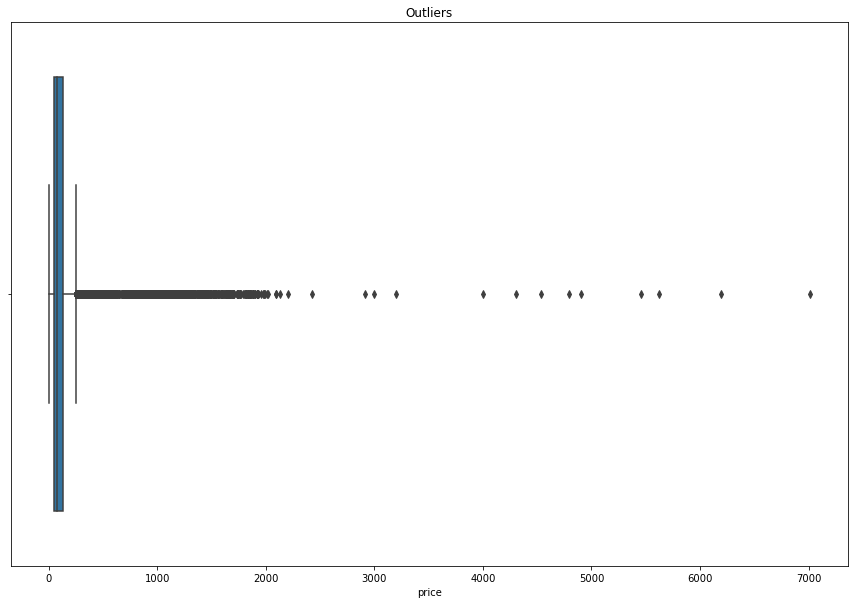

In [26]:
#finding outliers
plt.figure(figsize = (15,10))
sns.boxplot(train['price'])
plt.title('Outliers')
plt.show()

In [29]:
def replace_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [33]:
Lower_price,Upper_price= replace_outliers(train['price'])

In [34]:
train['price'] = np.where(train['price']>Upper_price,Upper_price,train['price'])
train['price'] = np.where(train['price']<Lower_price,Lower_price,train['price'])

C:\Users\hb728\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


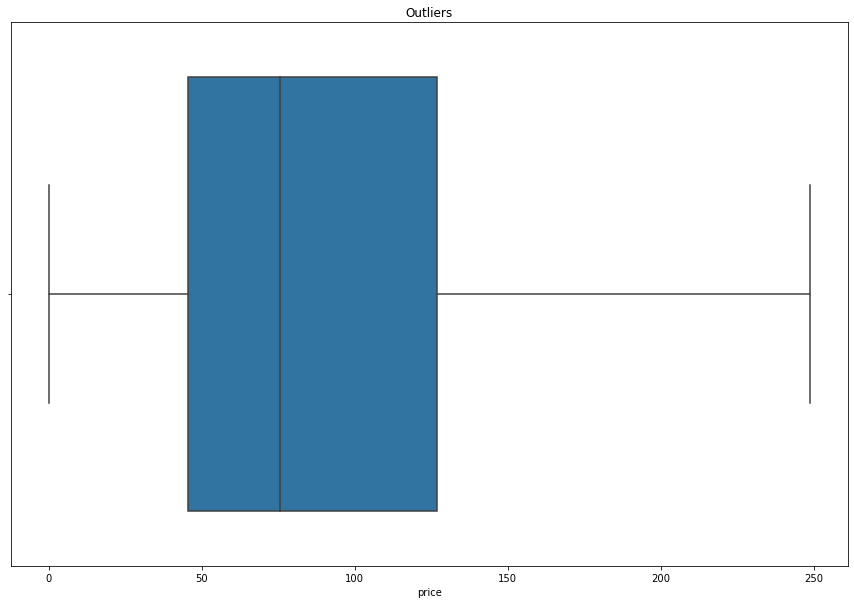

In [35]:
plt.figure(figsize = (15,10))
sns.boxplot(train['price'])
plt.title('Outliers')
plt.show()

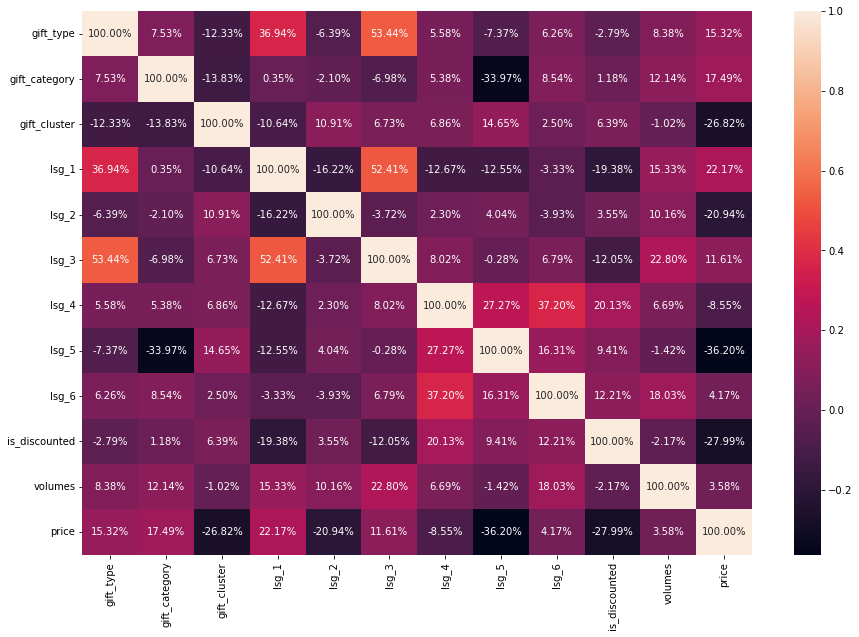

In [40]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),annot = True,fmt = '.2%')
plt.show()

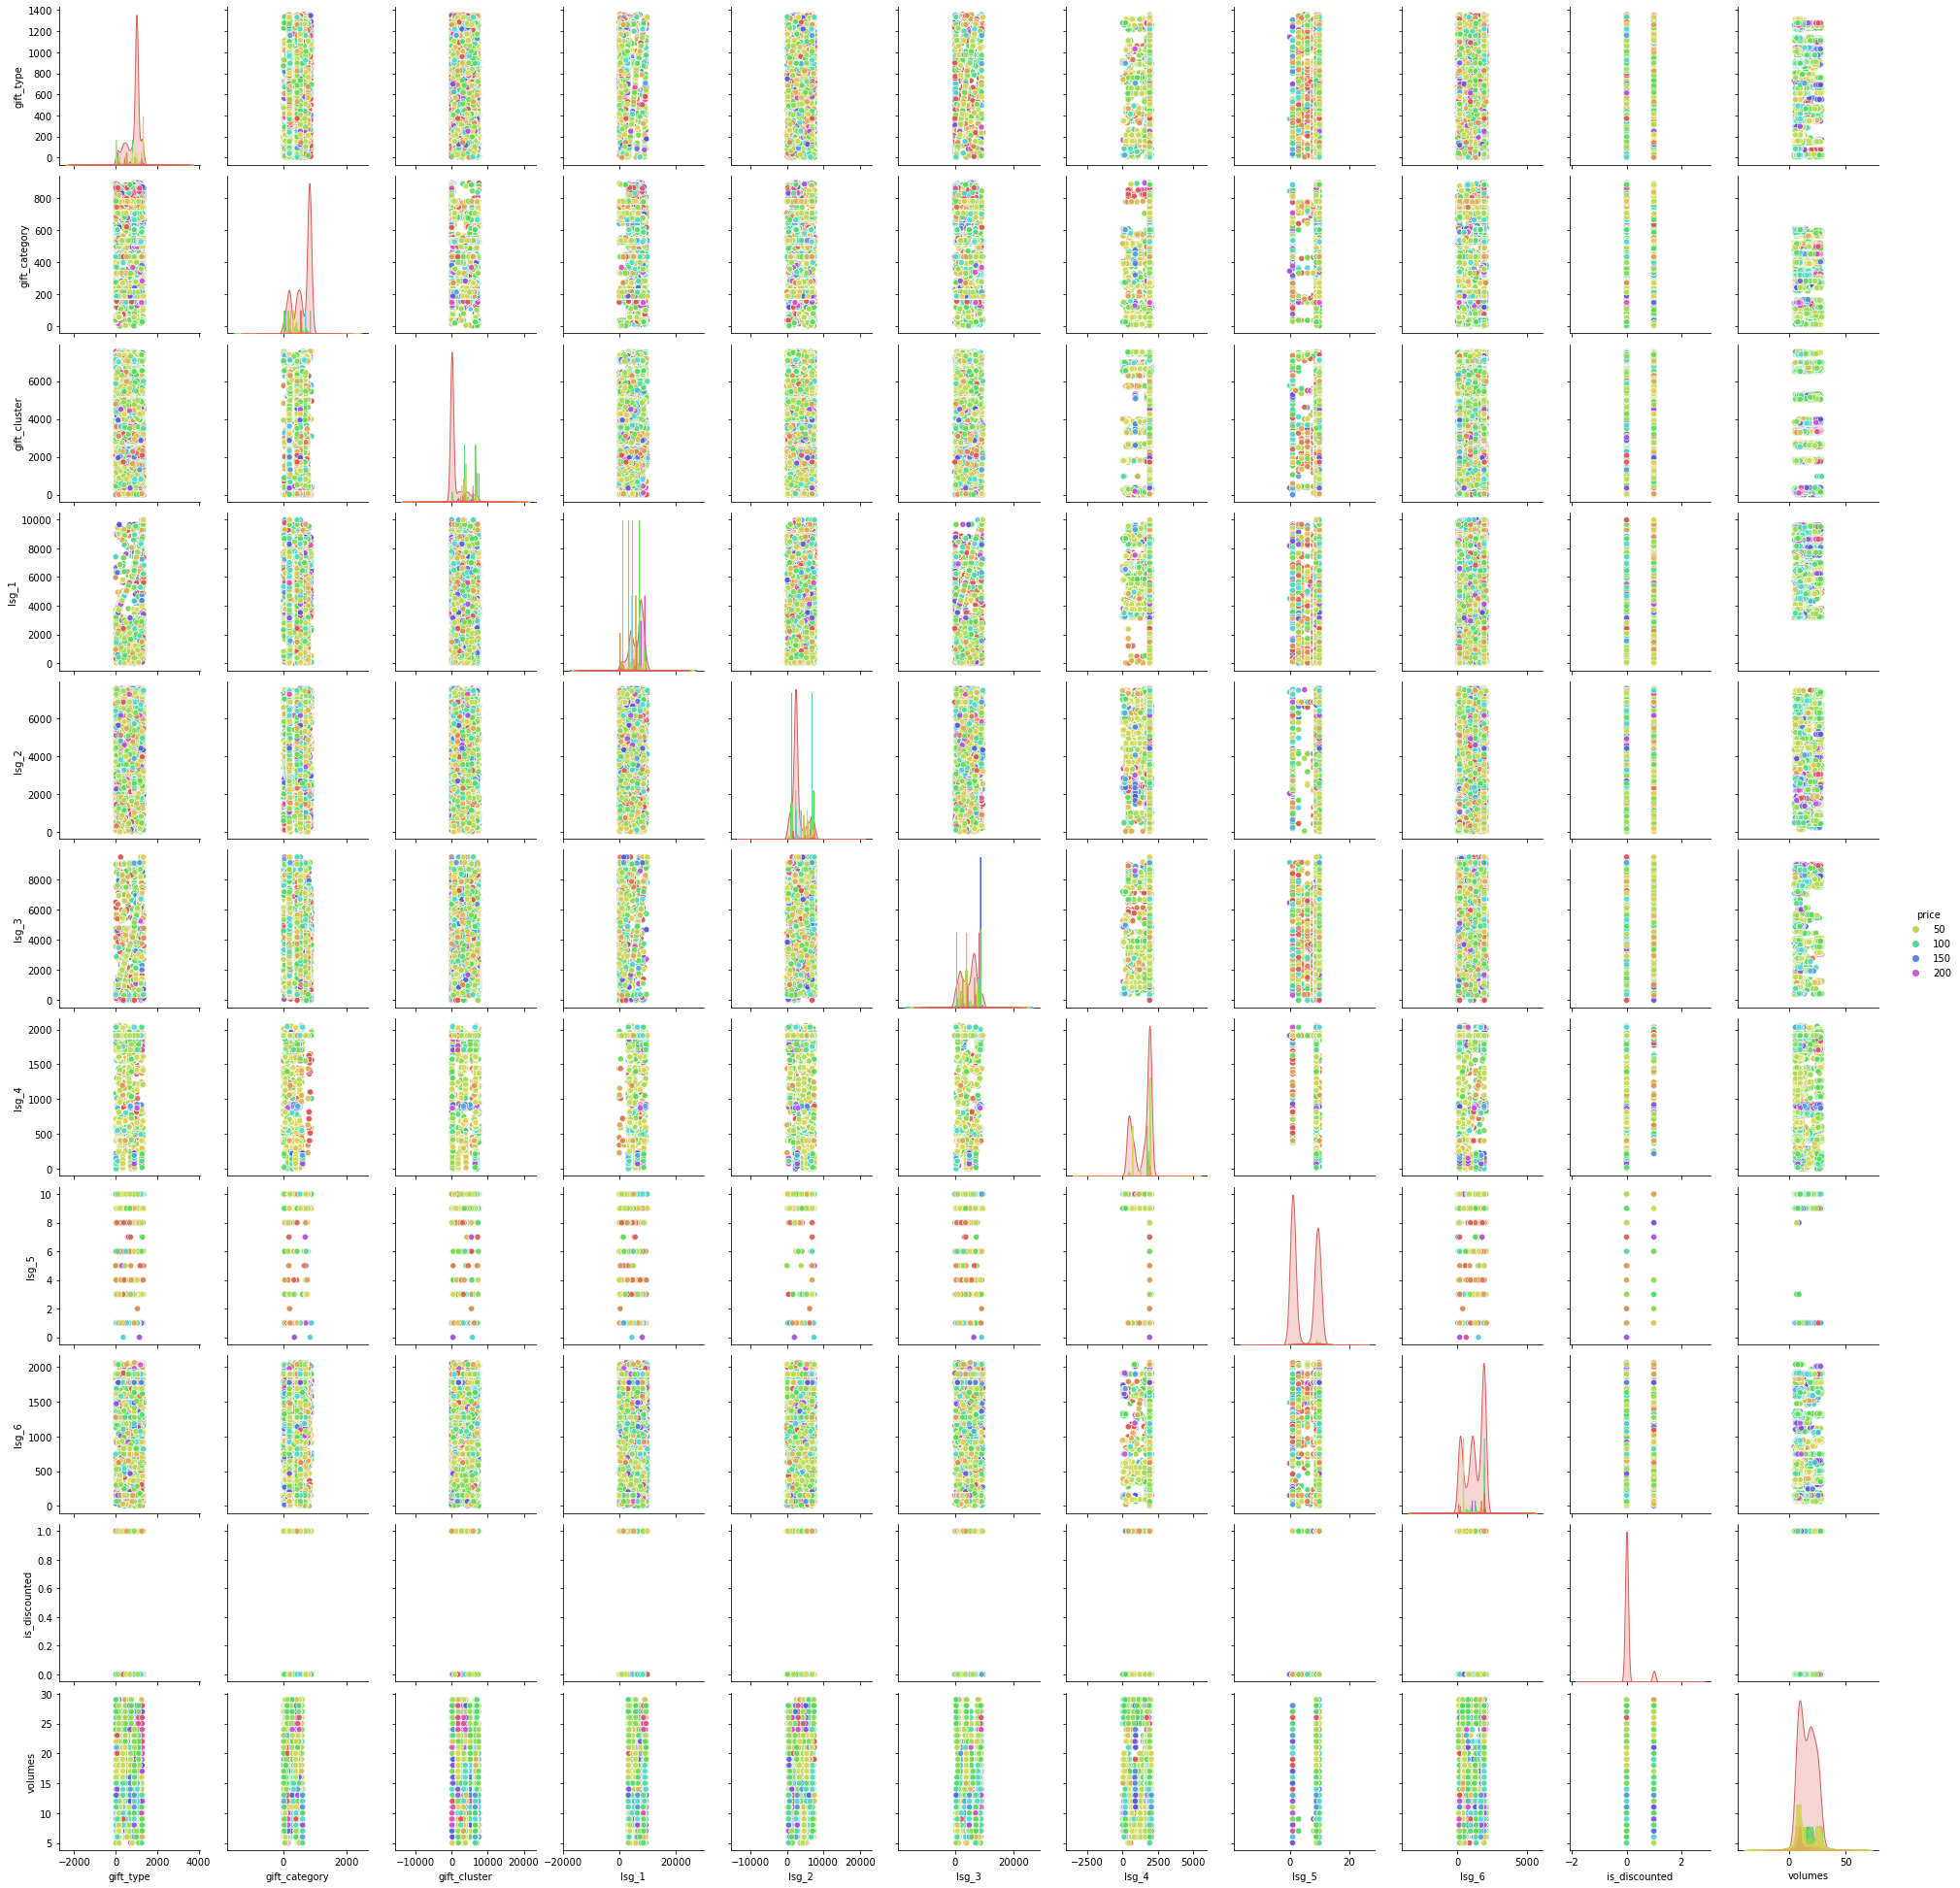

In [41]:
sns.pairplot(train,hue = 'price',palette = 'hls')
plt.show()

In [36]:
x = train[['gift_type','gift_category','gift_cluster','lsg_1','lsg_2','lsg_3','lsg_4','lsg_5','lsg_6','is_discounted']].values
x

array([[  61,  534, 3942, ...,   10,  554,    0],
       [  61,  534, 3942, ...,   10,  554,    1],
       [ 584,  262,    0, ...,    9, 1578,    1],
       ...,
       [ 509,  705,  821, ...,   10, 1451,    0],
       [ 682,  213, 5620, ...,   10,  822,    0],
       [1061,  212, 4987, ...,   10, 1899,    0]], dtype=int64)

In [37]:
y = train[['price']].values
y

array([[175.54],
       [ 95.8 ],
       [107.35],
       ...,
       [ 47.14],
       [ 47.68],
       [ 52.81]])

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
sc.fit_transform(x)

array([[-1.74342697,  0.59483247,  0.25133272, ...,  0.57348482,
        -1.02017262, -0.54599014],
       [-1.74342697,  0.59483247,  0.25133272, ...,  0.57348482,
        -1.02017262,  1.8315349 ],
       [-0.39967037, -0.56225996, -1.30001286, ...,  0.14783155,
         0.4472518 ,  1.8315349 ],
       ...,
       [-0.59236969,  1.32226926, -0.97691425, ...,  0.57348482,
         0.26525678, -0.54599014],
       [-0.14787659, -0.77070675,  0.91169749, ...,  0.57348482,
        -0.63612013, -0.54599014],
       [ 0.82589731, -0.77496077,  0.66258492, ...,  0.57348482,
         0.90725497, -0.54599014]])

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [43]:
dtr.fit(x,y)

DecisionTreeRegressor()

In [45]:
dtr.score(x,y)

0.9864994199220969

In [52]:
dtr_score = dtr.score(x,y)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [48]:
rfr.fit(x,y)

C:\Users\hb728\AppData\Local\Temp\ipykernel_24072\2796390845.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x,y)


RandomForestRegressor()

In [49]:
rfr.score(x,y)

0.9554494627936446

In [51]:
rfr_score = rfr.score(x,y)

In [54]:
from tabulate import tabulate

In [55]:
table = []
table.append(['Sr.No.', 'Regression Model', 'Score'])
table.append(['1', 'Decision Tree Regression', dtr_score])
table.append(['2', 'Random Forest Regression', rfr_score])

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤══════════════════════════╤══════════╕
│   Sr.No. │ Regression Model         │    Score │
╞══════════╪══════════════════════════╪══════════╡
│        1 │ Decision Tree Regression │ 0.986499 │
├──────────┼──────────────────────────┼──────────┤
│        2 │ Random Forest Regression │ 0.955449 │
╘══════════╧══════════════════════════╧══════════╛


In [56]:
x_test = test[['gift_type','gift_category','gift_cluster','lsg_1','lsg_2','lsg_3','lsg_4','lsg_5','lsg_6','is_discounted']].values

In [58]:
sc.fit(x_test)

StandardScaler()

In [59]:
y_pred = dtr.predict(x_test)

In [60]:
y_pred

array([ 75.25      , 246.02      ,  31.09666667, ..., 114.46375   ,
       248.645     ,  88.5       ])

In [61]:
gift_id = test['gift_id'].values

In [62]:
gift_id

array(['GF_2372', 'GF_13040', 'GF_5754', ..., 'GF_29168', 'GF_33797',
       'GF_33798'], dtype=object)

In [63]:
print(y_pred.shape)
print(gift_id.shape)

(13519,)
(13519,)


In [64]:
out = pd.DataFrame(list(zip(gift_id,y_pred)),columns = ['gift_id','price'])

In [65]:
out

,gift_id,price
0,GF_2372,75.250000
1,GF_13040,246.020000
2,GF_5754,31.096667
3,GF_1417,76.280000
4,GF_23204,21.410000
...,...,...
13514,GF_29169,114.463750
13515,GF_29165,114.463750
13516,GF_29168,114.463750
13517,GF_33797,248.645000


In [ ]:
output = out.to_csv(r'E:\hackerearth\4\output',index = False)